## **Hands On (HO) - 03**

### **Subject - Class**
_Multimedia Technology - R_

### **Topic Hands On - 03**
_Video Processing_

### **Personal Identity**
| **Student Name**  | Kevin Simorangkir      |
|-------------------|----------------------- |
| **ID Student**  | 121140150                |
| **Major**     | Informatics Enginnering    |

### **Language Version**
_English_
___


Mempersiapkan `library` yang akan digunakan dalam `Hands On (HO) - 03` ini. `Library` yang akan digunakan adalah `OS`, `glob`, `cv2`, `numpy`, `matplotlib`, `dlib`, dan `datetime`.

In [2]:
import os #library OS untuk mengakses fungsi-fungsi yang terdapat dalam sistem operasi
from glob import glob #library glob untuk mencari semua pathnames yang cocok dengan pola tertentu
import cv2 #library OpenCV untuk mengolah gambar dan video
import numpy as np #library numpy untuk melakukan operasi vektor dan matriks
import matplotlib.pyplot as plt #library matplotlib untuk membuat plot grafik
import dlib #library dlib untuk mendeteksi wajah
import datetime as dt #library datetime untuk mengolah data tanggal dan waktu

Mengikuti tahap _Pre-requisite_, yaitu:
1. Rekamlah sebuah video yang berdurasi kira-kira 60 detik dengan kamera ponsel. Toleransi durasi adalah 63 detik.
2. Resolusi video haruslah tepat 1920x1080 dengan FPS 30.
3. Gunakan tripod / phone holder agar video tetap stabil
4. Pastikan merekam dalam kondisi pencahayaan yang cukup (cahaya alami matahari lebih disarankan)
5. Anda harus duduk dengan tegak dan bersandar di kursi dan berada di tengah frame. Letakkan kedua tangan di atas lutut anda.
6. Selama perekaman, mintalah teman / keluarga anda untuk menghitung berapa kali anda bernafas selama 60 detik. Bukan hanya sekedar menghitung, teman / keluarga anda harus mencatat pada detik keberapa anda mulai menghembuskan nafas. Oleh karena itu, pastikan teman / keluarga anda menggunakan stopwatch pada HP mereka. (Tekan `LAP` setiap kali anda mulai menghembuskan nafas).
7. Pindahkan catatan tersebut ke dalam `csv` dengan format sebagai berikut:

| Nafas-ke | Second | Milisecond |
|----------|--------|-----------|
| 1        | 0      | 0         |
| 2        | 10     | 0         |

8. Di detik ke 30, gerakkan kepala anda (menghadap ke kanan dan kiri) hanya satu kali saja

### **Membuat Video Dari Gambar**
Mencari dan mengidentifikasi letak dari gambar yang akan dijadikan sebuah video. File akan diambil dari direktori tersebut.

In [3]:
ImagePath = (os.path.join(os.getcwd(), 'Image', 'kevin-rgb')) #mengambil path dari folder Video/kevin-rgb
ImageList = glob(os.path.join(ImagePath, '*.jpg')) #mengambil semua pathnames yang cocok dengan pola *.jpg

print('Lima path pertama dari ImageList:', ImageList[:5]) #menampilkan lima path pertama dari ImageList

Lima path pertama dari ImageList: []


Melakukan penyortingan terhadap file yang ada di dalam direktori tersebut.

In [4]:
ImageList = sorted(ImageList, key=lambda x: int(x.split('/')[-1].split('.')[0])) #mengurutkan ImageList berdasarkan nama file   

print('Lima path pertama dari ImageList setelah diurutkan:', ImageList[:5]) #menampilkan lima path pertama dari ImageList setelah diurutkan
print('Jumlah gambar:', len(ImageList)) #menampilkan jumlah gambar


Lima path pertama dari ImageList setelah diurutkan: []
Jumlah gambar: 0


---
## **Analisis Pertama**

**Pertanyaan**


Jelaskan maksud dari `list_imgs = sorted(list_imgs, key=lambda x: int(x.split('/')[-1].split('.')[0]))` !

**Jawaban**


Maksud dari `list_imgs = sorted(list_imgs, key=lambda x: int(x.split('/')[-1].split('.')[0]))` adalah untuk melakukan penyortingan terhadap file yang ada di dalam direktori tersebut. Penyortingan dilakukan berdasarkan nama file yang ada di dalam direktori tersebut. Penyortingan dilakukan secara ascending, dimana file yang memiliki nama lebih kecil akan diletakkan di urutan pertama, sedangkan file yang memiliki nama lebih besar akan diletakkan di urutan terakhir.

---

Memuat gambar yang ada di dalam direktori tersebut. Gambar akan dimuat dalam ImageList. Image akan diubah dalam 3 dimensi (RGB) dan akan diubah dalam bentuk array.

In [5]:
image = [] #membuat list image

for ImagePath in ImageList: #mengambil path dari ImageList
    images = cv2.imread(ImagePath) #membaca gambar
    image.append(images) #menambahkan gambar ke list image 

image_array = np.array(image) #mengubah list image menjadi array    

print('Ukuran array:', image_array.shape) #menampilkan ukuran array
print('Tipe data:', image_array.dtype) #menampilkan tipe data

Ukuran array: (0,)
Tipe data: float64


Menyimpan gambar yang telah diubah dalam bentuk array ke dalam list.

In [6]:
LocationSave = os.path.join(os.getcwd(), 'Video', 'kevin-rgb.mp4') #mengambil path dari folder Video/kevin-rgb
fourcc = cv2.VideoWriter_fourcc(*'XVID') #membuat objek video

if image_array.size > 0:
    height, width, layers = image_array[0].shape #mengambil ukuran gambar
    Video = cv2.VideoWriter(LocationSave, fourcc, 30, (width, height)) #membuat objek video

    for Image in image_array: #mengambil gambar dari image_array
        Video.write(Image) #menulis gambar ke objek video
    Video.release() #menutup objek video
else:
    print("Image dalam directory tidak ditemukan") #menampilkan pesan jika image dalam directory tidak ditemukan    


Image dalam directory tidak ditemukan


---
## **Analisis Kedua**

**Pertanyaan**


Jelaskan tentang bagian kode berikut:
    ```python
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    ```

    Apakah ada opsi lain selain `mp4v`? Jika ada, coba gunakan dan jelaskan.

**Jawaban**


Bagian kode pada `fourcc = cv2.VideoWriter_fourcc(*'mp4v')` adalah untuk menentukan codec yang akan digunakan dalam pembuatan video. Codec yang digunakan adalah `mp4v`. Ada beberapa opsi lain selain `mp4v`, yaitu: `XVID`, `MJPG`, `DIVX`, `X264`, `WMV1`, `WMV2`, `WMV3`, `WMV4`, `H264`, `H265`, `MPEG`, `MPEG1`, `MPEG2`, `MPEG4`, `VP80`.

---

Menyimpan setiap bingkai video menjadi sebuah gambar. Gambar akan disimpan dalam direktori yang telah ditentukan.

In [7]:
VideoPath = (os.path.join(os.getcwd(), 'Video', 'kevin-rgb.mp4')) #mengambil path dari folder Video/kevin-rgb
ImageSeqPath = (os.path.join(os.getcwd(), 'Image', 'kevin-seq')) #mengambil path dari folder Image/kevin-seq

if not os.path.exists(ImageSeqPath): #jika folder Image/kevin-seq tidak ada
    os.makedirs(ImageSeqPath) #membuat folder Image/kevin-seq

Capt = cv2.VideoCapture(VideoPath) #membaca video
Frame = 0 #inisialisasi frame

while Frame < 100: #membaca 100 frame
    ret, FrameImg = Capt.read() #membaca frame
    if not ret: #jika frame tidak ada
        break #keluar dari loop
    cv2.imwrite(os.path.join(ImageSeqPath, 'frame'+str(Frame)+'.jpg'), FrameImg) #menyimpan frame
    Frame += 1 #menambah frame

Capt.release() #menutup video
print('Seratus frame pertama telah disimpan di Image/kevin-seq') #menampilkan pesan


Seratus frame pertama telah disimpan di Image/kevin-seq


---
## **Analisis Ketiga**

**Pertanyaan**


Membuat video dengan FPS yang lebih rendah.

1. Dengan menggunakan video, simpanlah frame gambar setiap 3 frame. Begini ilustrasinya, jika ada frame 1 s/d 30, maka anda hanya perlu menyimpan frame 1, 4, 7, 10, 13, 16, 19, 22, 25, 28.
2. Dengan analogi ini, artinya anda mengurangi FPS-nya. Berapakah FPS yang baru?
3. Untuk setiap gambar, convertlah ke dalam format grayscale dan resize menjadi 1280 x 720.
4. Untuk setiap gambar, berikanlah titik merah (ukuran bebas, namun terlihat ketika video diputar). Titik tersebut bergerak dari kiri ke kanan untuk setiap frame. Titik tersebut harus sampai di ujung kanan gambar pada frame terakhir. Anda harus melakukan ini secara manual dengan memanipulasi matriks (tidak boleh pakai fungsi / library yang sudah ada)
5. Ingat, karena ini titik merah, maka channel warna pada video anda haruslah RGB (walaupun gambarnya telah menjadi grayscale).
6. Save video tersebut dengan nama `video_low_fps.mp4`

**Jawaban**

In [8]:
# Path to save the new video
LowFPSVideoPath = os.path.join(os.getcwd(), 'Video', 'Kevin-LowFPS.mp4')

# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(LowFPSVideoPath, fourcc, 10, (1280, 720))

# Reinitialize the video capture
Capt = cv2.VideoCapture(VideoPath)

frame_count = 0
while True:
    ret, frame = Capt.read()
    if not ret:
        break
    if frame_count % 3 == 0:
        # Convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Resize to 1280x720
        resized_frame = cv2.resize(gray_frame, (1280, 720))
        # Convert back to RGB
        rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_GRAY2RGB)
        # Add red dot
        dot_position = int((frame_count // 3) * (1280 / (frame_count // 3 + 1)))
        rgb_frame[360:365, dot_position:dot_position+5] = [255, 0, 0]
        # Write the frame to the video
        out.write(rgb_frame)
    frame_count += 1

# Release everything
Capt.release()
out.release()

print('Video dengan frame rate rendah telah disimpan di Video/Kevin-LowFPS.mp4') #menampilkan pesan

Video dengan frame rate rendah telah disimpan di Video/Kevin-LowFPS.mp4


---

Memindahkan data sebuah video ke dalam sebuah array. Array tersebut akan diubah menjadi sebuah video. Dalam hal ini menggunakan `cv2.VideoCapture` untuk membaca video yang telah dibuat sebelumnya.

In [9]:
VideoPath = (os.path.join(os.getcwd(), 'Video', 'kevin-rgb.mp4')) #mengambil path dari folder Video/kevin-rgb
Capt = cv2.VideoCapture(VideoPath) #membaca video
Frame = [] #membuat list Frame

while True: #loop
    ret, FrameImg = Capt.read() #membaca frame
    if not ret: #jika frame tidak ada
        break #keluar dari loop
    Frame.append(FrameImg) #menambah frame ke list Frame

FrameArray = np.array(Frame) #mengubah list Frame menjadi array
Capt.release() #menutup video

print('Ukuran array:', FrameArray.shape) #menampilkan ukuran array
print('Tipe data:', FrameArray.dtype) #menampilkan tipe data
print('Lima frame pertama:', FrameArray[:5]) #menampilkan lima frame pertama

Ukuran array: (1902, 720, 1280, 3)
Tipe data: uint8
Lima frame pertama: [[[[200 204 220]
   [200 204 220]
   [200 204 220]
   ...
   [168 175 188]
   [168 175 188]
   [168 175 188]]

  [[200 204 220]
   [200 204 220]
   [200 204 220]
   ...
   [168 175 188]
   [168 175 188]
   [168 175 188]]

  [[200 204 220]
   [200 204 220]
   [200 204 220]
   ...
   [168 175 188]
   [168 175 188]
   [168 175 188]]

  ...

  [[196 192 195]
   [202 198 201]
   [199 195 198]
   ...
   [ 18  14  17]
   [ 13   9  12]
   [ 12   8  11]]

  [[199 195 198]
   [198 194 197]
   [201 197 200]
   ...
   [ 10   6   9]
   [  8   4   7]
   [  8   4   7]]

  [[202 198 201]
   [199 195 198]
   [198 194 197]
   ...
   [  6   2   5]
   [  6   2   5]
   [  5   1   4]]]


 [[[200 204 220]
   [200 204 220]
   [200 204 220]
   ...
   [168 175 188]
   [168 175 188]
   [168 175 188]]

  [[200 204 220]
   [200 204 220]
   [200 204 220]
   ...
   [168 175 188]
   [168 175 188]
   [168 175 188]]

  [[200 204 220]
   [200 204 22

Mengambil satu gambar dari video yang telah dibuat sebelumnya. Gambar akan diubah dalam bentuk grayscale dan akan diubah dalam bentuk array.

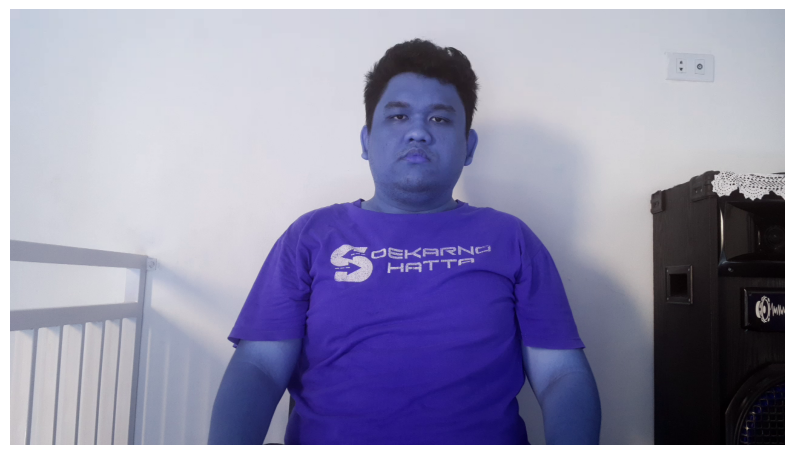

In [10]:
SingleImage = FrameArray[0].copy() #mengambil frame pertama 

plt.figure(figsize=(10, 10)) #membuat figure
plt.imshow(SingleImage) #menampilkan gambar
plt.axis('off') #menghilangkan axis
plt.show() #menampilkan gambar

Mengubah warna pada gambar dari BGR menjadi RGB.
BGR adalah format warna yang digunakan oleh OpenCV, sedangkan RGB adalah format warna yang digunakan oleh matplotlib.

In [17]:
FrameArrayRGB = np.array([cv2.cvtColor(Frame, cv2.COLOR_BGR2RGB) for Frame in FrameArray]) #mengubah warna frame menjadi RGB
print('Frame Array RGB:', FrameArrayRGB.shape) #menampilkan lima frame pertama

Frame Array RGB: (1902, 720, 1280, 3)


In [ ]:
S